# Matplotlib

Matplotlib es una biblioteca de gráficos 2D en python que produce una variedad de formatos impresos y entornos interactivos a través de plataformas. Matplotlib se puede usar en scripts python, el shell python e ipython, servidores de aplicaciones web y seis toolkits gráficos de interfaz de usuario.

Puede generar gráficos, histogramas, espectros de potencia, gráficos de barras, gráficos de errores, diagramas de dispersión, etc.

Documentación: <a>http://matplotlib.org/</a>

In [1]:
%matplotlib inline
from pylab import *

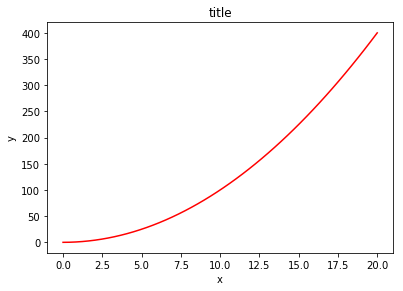

In [2]:
x = linspace(0, 20)
y = x ** 2

fig = plt.figure()

# left, bottom, width, height (range 0 to 1)
grafico = fig.add_axes([0.1, 0.1, 0.8, 0.8])

grafico.plot(x, y, 'r')

grafico.set_xlabel('x')
grafico.set_ylabel('y')
grafico.set_title('title');

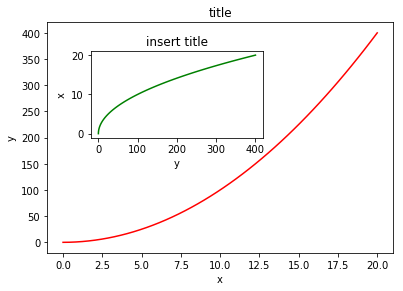

In [3]:
fig = plt.figure()

grafico = fig.add_axes([0.1, 0.1, 0.8, 0.8])
subgrafico = fig.add_axes([0.2, 0.5, 0.4, 0.3])

# gráfico principal
grafico.plot(x, y, 'r')
grafico.set_xlabel('x')
grafico.set_ylabel('y')
grafico.set_title('title')

# subgrafico
subgrafico.plot(y, x, 'g')
subgrafico.set_xlabel('y')
subgrafico.set_ylabel('x')
subgrafico.set_title('insert title');

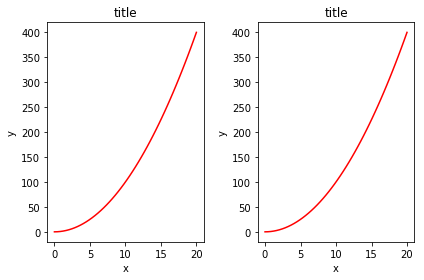

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

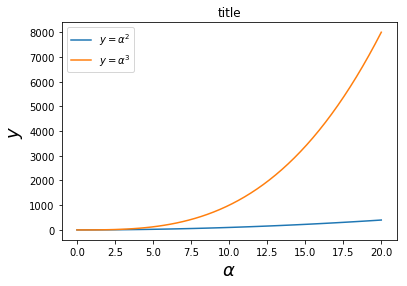

In [5]:
# example with a legend and latex symbols
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

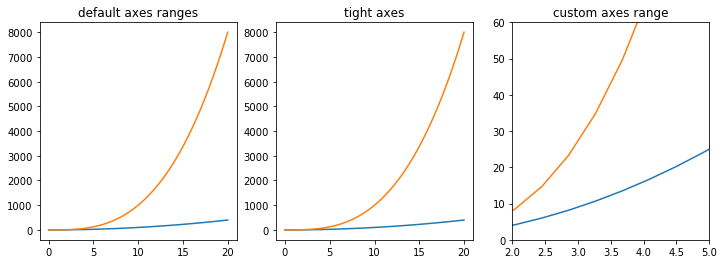

In [6]:
# axis controls
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

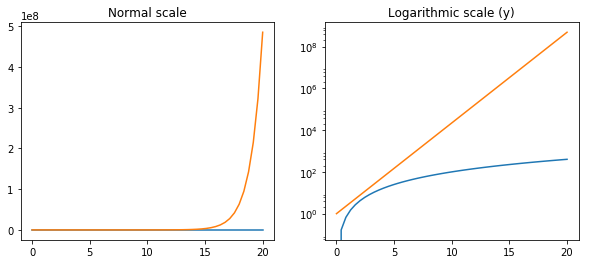

In [7]:
# scaling
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

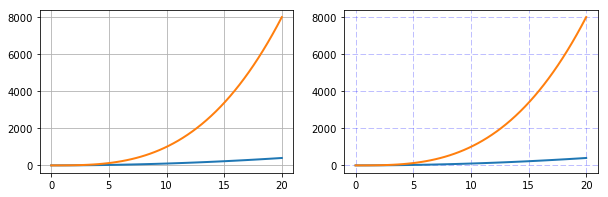

In [8]:
# axis grid
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

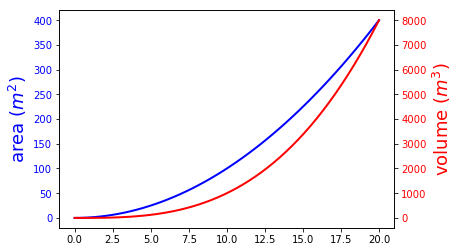

In [9]:
# twin axes example
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

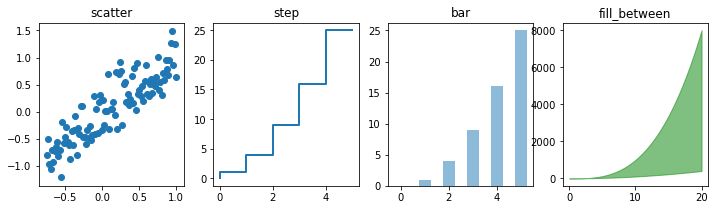

In [10]:
# otros tipos de graficos
xx = np.linspace(-0.75, 1., 100)
n = array([0,1,2,3,4,5])

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

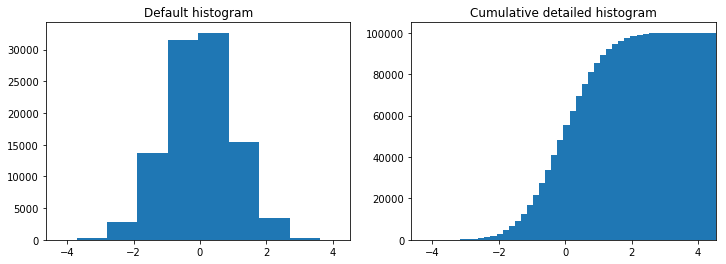

In [11]:
# histogramas
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

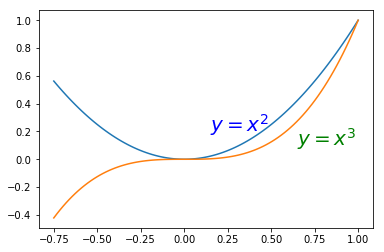

In [12]:
# anotaciones
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

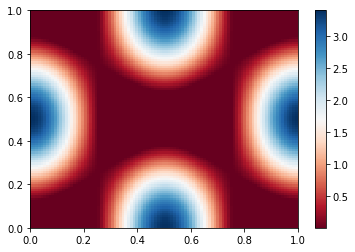

In [13]:
# color map
alpha = 0.7
phi_ext = 2 * pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return ( + alpha - 2 * cos(phi_p)*cos(phi_m) - 
        alpha * cos(phi_ext - 2*phi_p))

phi_m = linspace(0, 2*pi, 100)
phi_p = linspace(0, 2*pi, 100)
X,Y = meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

fig, ax = plt.subplots()

p = ax.pcolor(X/(2*pi), Y/(2*pi), Z, 
              cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

In [14]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

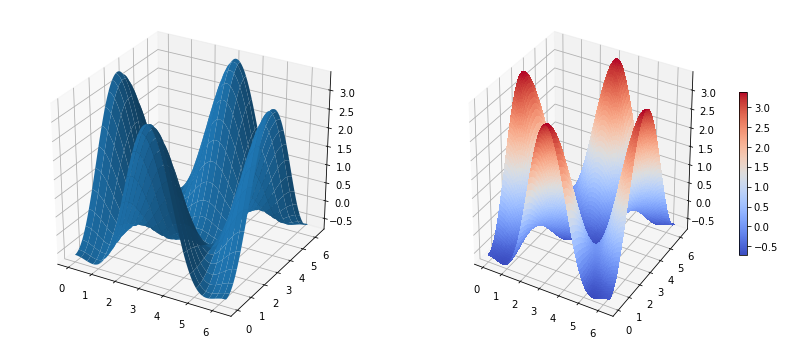

In [15]:
# surface plots
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' 
# keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                    cmap=cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

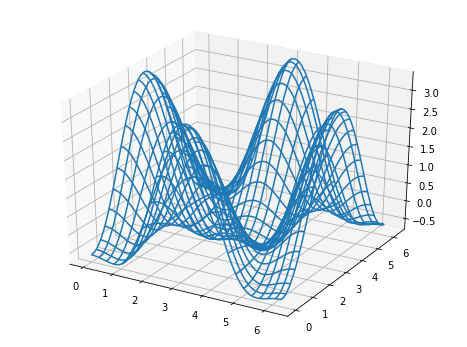

In [16]:
# wire frame
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

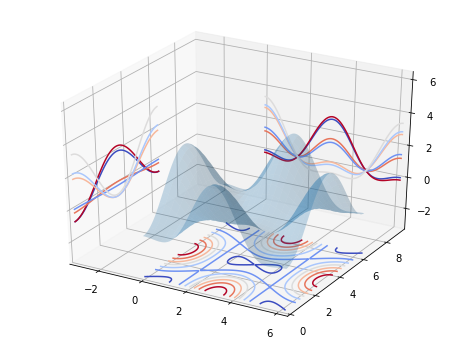

In [17]:
# contour plot with projections
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-pi, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-pi, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*pi, cmap=cm.coolwarm)

ax.set_xlim3d(-pi, 2*pi);
ax.set_ylim3d(0, 3*pi);
ax.set_zlim3d(-pi, 2*pi);